## Importing the dependencies

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score

## Data collection

In [9]:
data = pd.read_csv("heart_disease_data.csv")

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# the destribution of target variable 
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Splitting the Features & Target

In [15]:
x = data.drop(columns='target',axis=1)
y = data['target']

## Train Test Split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Training

In [17]:
LR = LogisticRegression()
# Training the model with training data
LR.fit(x_train,y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

## Accuracy Score

In [20]:
# Accuracy on training data
x_train_prediction = LR.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data: ',training_accuracy)

Accuracy on training data:  0.8512396694214877


In [21]:
# Accuracy on test data
x_test_prediction = LR.predict(x_test)
testing_accuracy = accuracy_score(x_test_prediction,y_test)
print('Accuracy on testing data: ',testing_accuracy)

Accuracy on testing data:  0.819672131147541


## Confusion Matrix

In [23]:
cf_matrix = confusion_matrix(y_test,x_test_prediction)
print(cf_matrix)
tn,fp,fn,tp = cf_matrix.ravel()
print(tn,fp,fn,tp)

[[23  5]
 [ 6 27]]
23 5 6 27


<Axes: >

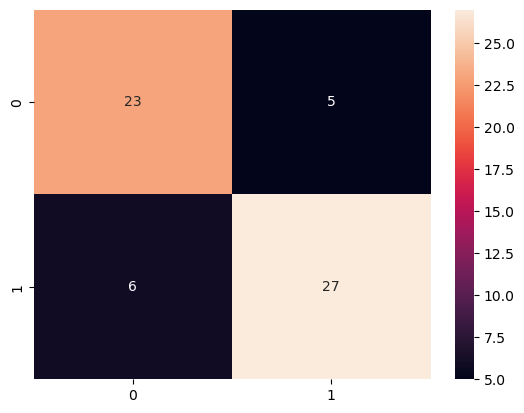

In [25]:
sns.heatmap(cf_matrix,annot=True)

## Precision Score

In [32]:
# precision_score for training data
precision_train = precision_score(x_train_prediction,y_train)
print('Precision Score for Training data: ',precision_train)

Precision Score for Training data:  0.9166666666666666


In [33]:
# precision_score for test data
precision_test = precision_score(x_test_prediction,y_test)
print('Precision Score for test data: ',precision_test)

Precision Score for test data:  0.8181818181818182


## Recall Score

In [31]:
# recall_score for training data
recall_score_train = recall_score(x_train_prediction,y_train)
print('Recall Score for Training data: ',recall_score_train)

Recall Score for Training data:  0.8287671232876712


In [34]:
# recall_score for test data
recall_score_test = recall_score(x_test_prediction,y_test)
print('Recall Score for test data: ',recall_score_test)

Recall Score for test data:  0.84375


## F1 Score

In [36]:
# f1_score for training data
f1_score_train = f1_score(x_train_prediction,y_train)
print('F1 Score for Training data: ',f1_score_train)

F1 Score for Training data:  0.8705035971223022


In [37]:
# f1_score for test data
f1_score_test = f1_score(x_test_prediction,y_test)
print('F1 Score for test data: ',f1_score_test)

F1 Score for test data:  0.8307692307692308
